# Here, we implemented the linear machine learning model that was used to predict students' grades with the polynomial model, which was almost as accurate as linear.

### Used lib

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### We read our own data

In [13]:
data = pd.read_csv("Dataset/Student_performance_data _.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### We separate dependent variables and independent variables

In [14]:
X = data[['StudyTimeWeekly', 'Absences', 'ParentalSupport']]
Y = data[['GPA']]

### We separate the test data and the test data and train it

In [15]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=20)

### We wrote a function to get the best grade for use in the machine

In [37]:
def get_best():
    degree = [1, 2, 3, 4, 5]
    best_degree = 1
    best_score = -np.inf
    
    for dg in degree:
        feature_ploy = PolynomialFeatures(degree=dg)
        train_x_ploy = feature_ploy.fit_transform(train_x)
        test_x_ploy = feature_ploy.transform(test_x)
    
        model = LinearRegression()
        model.fit(train_x_ploy,train_y)
    
        predict_y = model.predict(test_x_ploy)
    
        score = r2_score(test_y, predict_y)
            
        # print('after chnage ',dg,score)
        
        if score > best_score:
            # print ('befor ',dg,score)
            best_score = score
            best_degree = dg

        return best_score, best_degree


### With the obtained degree, we teach our own machine

In [39]:
best_score, best_degree = get_best()
featur_poly = PolynomialFeatures(degree=best_degree)
train_x_ploy = featur_poly.fit_transform(X)
model = LinearRegression()
model.fit(train_x_ploy,Y)

# print(best_degree, best_score)

LinearRegression()

### We train the mavhine

In [18]:
poly_test_x = featur_poly.transform(test_x)
predict_y = model.predict(poly_test_x)

### Obtaining the coefficient of determination

In [21]:
r2 = r2_score(test_y, predict_y)
print(r2)

0.9140793193966026


### Graph the data to see if it is properly distributed

Text(0, 0.5, 'Y')

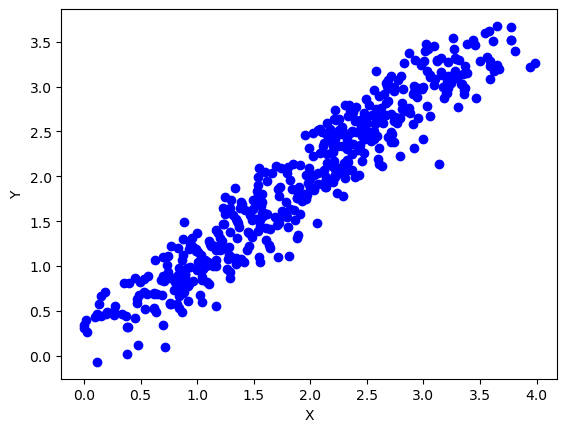

In [24]:
plt.scatter(test_y, predict_y, color='blue')
# plt.plot(X, model.predict(featur_poly.transform(X)), color='red')
plt.xlabel('X')
plt.ylabel('Y')

### Check the pattern to get a better result

Text(0, 0.5, 'res')

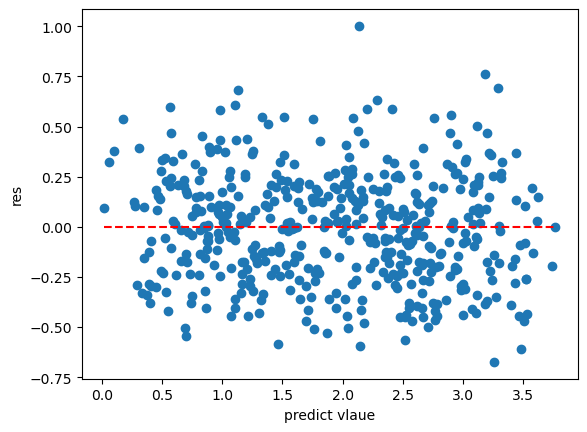

In [34]:
res = test_y - predict_y

plt.scatter(predict_y, res)
plt.hlines(y=0, xmin=np.min(predict_y), xmax=np.max(predict_y), colors='r', linestyles='dashed')
plt.xlabel('predict vlaue')
plt.ylabel('res')